<a href="https://colab.research.google.com/github/Ximena-21/Analisis_datos/blob/main/Entrega_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Analisis de Emisiones ambientales globales**

Aqui realizaremos un breve analisis de las diferentes emisiones de dioxido de carbono (CO2), generados por diferentes sectores como la produccion, energetica, manufactura, transporte y edificaciones.

Daremos un vistazo hacia el sector que mas emisiones de dioxido de carbono produce, la relacion entre el sector y la produccion de emisiones.

Los Datos que trabajaremos a continuacion fueron tomados de la plataforma kaggle, estos tienen una actualizacion de hace 5 meses aproximadamente, aqui se encontro una colección de indicadores ambientales y datos de emisiones de varios países del mundo. Para la realizacion del analisis de estos datos aplicaremos modelos de regresion y clasificacion con Pandas, esto con el fin de obtener un analisis, seguimiento y toma de decisiones que contribuyan a tomar acciones que permitan mitigar y disminuir las emisiones de estos gases.

In [399]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Proyecto_Tecnolochicas/World_CO2_Emission_Data.csv")


## Limpieza de Datos



In [ ]:
nan_rows = data.isna().sum(axis=1)
nan_rows

0        0
1        0
2        0
3        0
4        0
        ..
8246    67
8247    67
8248    67
8249    66
8250    66
Length: 8251, dtype: int64

In [ ]:
data_filtered = data.drop(data[nan_rows > 30].index)

In [ ]:
#rename columns
column_name_mapping = {
	'Country Name': 'country',
	'Country Code': 'code_country',
	'Series Name': 'variable',
  'Series Code': 'code_var',
  '1960 [YR1960]': '1960',
	'1961 [YR1961]': '1961',
	'1962 [YR1962]': '1962',
  '1963 [YR1963]': '1963',
	'1964 [YR1964]': '1964',
	'1965 [YR1965]': '1965',
  '1966 [YR1966]': '1966',
	'1967 [YR1967]': '1967',
  '1968 [YR1968]': '1968',
	'1969 [YR1969]': '1969',
	'1970 [YR1970]': '1970',
  '1971 [YR1971]': '1971',
	'1972 [YR1972]': '1972',
  '1973 [YR1973]': '1973',
	'1974 [YR1974]': '1974',
	'1975 [YR1975]': '1975',
  '1976 [YR1976]': '1976',
	'1977 [YR1977]': '1977',
  '1978 [YR1978]': '1978',
	'1979 [YR1979]': '1979',
	'1980 [YR1980]': '1980',
  '1981 [YR1981]': '1981',
	'1982 [YR1982]': '1982',
  '1983 [YR1983]': '1983',
	'1984 [YR1984]': '1984',
	'1985 [YR1985]': '1985',
  '1986 [YR1986]': '1986',
	'1987 [YR1987]': '1987',
  '1988 [YR1988]': '1988',
	'1989 [YR1989]': '1989',
	'1990 [YR1990]': '1990',
  '1991 [YR1991]': '1991',
	'1992 [YR1992]': '1992',
  '1993 [YR1993]': '1993',
	'1994 [YR1994]': '1994',
	'1995 [YR1995]': '1995',
  '1996 [YR1996]': '1996',
	'1997 [YR1997]': '1997',
  '1998 [YR1998]': '1998',
	'1999 [YR1999]': '1999',
	'2000 [YR2000]': '2000',
  '2001 [YR2001]': '2001',
	'2002 [YR2002]': '2002',
  '2003 [YR2003]': '2003',
	'2004 [YR2004]': '2004',
	'2005 [YR2005]': '2005',
  '2006 [YR2006]': '2006',
	'2007 [YR2007]': '2007',
  '2008 [YR2008]': '2008',
	'2009 [YR2009]': '2009',
	'2010 [YR2010]': '2010',
  '2011 [YR2011]': '2011',
	'2012 [YR2012]': '2012',
  '2013 [YR2013]': '2013',
	'2014 [YR2014]': '2014',
	'2015 [YR2015]': '2015',
  '2016 [YR2016]': '2016',
	'2017 [YR2017]': '2017',
  '2018 [YR2018]': '2018',
	'2019 [YR2019]': '2019',
	'2020 [YR2020]': '2020',
  '2021 [YR2021]': '2021',
	'2022 [YR2022]': '2022',
  '2023 [YR2023]': '2023',
}

In [ ]:
new_data = data_filtered.rename(columns=column_name_mapping)

In [ ]:
# Reemplazar ".." con 0 en todo el DataFrame
new_data.replace('..', 0, inplace=True)


In [ ]:
new_data.reset_index(drop=True).tail()

my_data = new_data.loc[:, ['country', 'code_country', 'variable', 'code_var'] + [str(año) for año in range(1990, 2022)]]
my_data

#Filter rows
clean_data = my_data.drop(my_data.index[8149:8246])
clean_data


,country,code_country,variable,code_var,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,0,0,0,0,0,0,...,1.63878128180552,1.36338448111679,1.28490840585691,1.44307895621429,1.44782682979766,1.4533391998403,1.59805470965195,1.55643923193288,1.40187835275711,0
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,35990789.6764766,35244502.1600685,19296048.1118209,19173399.2334259,19176964.8576402,19225447.4694438,...,326751092.146682,275631280.588653,263338827.184962,278618004.122999,264910281.973801,276138145.017514,291498572.368998,297253521.47533,284648920.796122,0
2,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,5361.61,5603.93,5668.51,5712.9575,5925.005,6246.1625,...,11379.2825,11284.75,11476.1975,10834.435,10617.2325,10314.9575,10549.4125,10222.785,10679.11,0
3,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,2705.2738,2786.5384,2735.0142,2767.526,2592.9576,2704.8566,...,4398.5098,4440.1106,4744.2494,4702.3804,4680.2688,4892.1766,4289.9782,4258.4498,4465.977,0
4,Afghanistan,AFG,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,0,0,0,0,0,0,...,0.561765919038987,0.489964677117366,0.470845775464021,0.50292618070602,0.454516147902539,0.477468930733004,0.516563214552466,0.50918979595916,0.404094523787425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,Sub-Saharan Africa (excluding high income),SSA,HFC gas emissions (thousand metric tons of CO2...,EN.ATM.HFCG.KT.CE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8145,Sub-Saharan Africa (excluding high income),SSA,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,561068.940778,581477.761726,597550.284496,605849.714554,621039.662289,627239.886141,...,827736.665413,832441.26469,843590.791576,858081.053358,872801.335372,880535.357404,893893.347015,915680.629039,932356.826038,0
8146,Sub-Saharan Africa (excluding high income),SSA,Methane emissions in energy sector (thousand m...,EN.ATM.METH.EG.KT.CE,143242.937775,153217.272839,158571.047323,161502.779085,164564.510846,171896.214028,...,223587.700687,221144.107119,226207.513549,226454.519982,219605.113871,222084.507762,221661.301649,226844.095541,218625.389432,0
8147,Sub-Saharan Africa (excluding high income),SSA,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,255339.441479,258364.902325,262020.060553,263369.364793,325873.074628,329097.213488,...,437948.325511,440928.469806,441225.40874,447858.437857,461888.845073,464334.462908,467017.217756,475065.252146,491788.577367,0


In [ ]:
# Lista de columnas de años a convertir
rows_convert = [str(año) for año in range(1990, 2022)]

# Convertir las columnas seleccionadas a tipo de dato float
clean_data[rows_convert] = clean_data[rows_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Filtrar las variables de interés
variables_interest = ['CO2 intensity (kg per kg of oil equivalent energy use)',
                      'CO2 emissions from transport (% of total fuel combustion)',
                      'CO2 emissions from solid fuel consumption (% of total)',
                      'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
                      'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
                      'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
                      'CO2 emissions from liquid fuel consumption (% of total)',
                      'CO2 emissions from gaseous fuel consumption (% of total)',
                      'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
                      'CO2 emissions (metric tons per capita)',
                      'CO2 emissions (kt)',
                      'Total greenhouse gas emissions (kt of CO2 equivalent)',
                      'Adjusted savings: carbon dioxide damage (current US$)',
                      'Adjusted savings: carbon dioxide damage (% of GNI)']
df = clean_data[clean_data['variable'].isin(variables_interest)]
df = df.round(2)
df = df.reset_index(drop=True)
df


,country,code_country,variable,code_var,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,0.00,0.00,0.00,0.00,0.00,0.00,...,1.640000e+00,1.360000e+00,1.280000e+00,1.440000e+00,1.450000e+00,1.450000e+00,1.600000e+00,1.560000e+00,1.400000e+00,0.0
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,35990789.68,35244502.16,19296048.11,19173399.23,19176964.86,19225447.47,...,3.267511e+08,2.756313e+08,2.633388e+08,2.786180e+08,2.649103e+08,2.761381e+08,2.914986e+08,2.972535e+08,2.846489e+08,0.0
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2046.87,1941.37,1525.47,1527.89,1493.59,1457.69,...,1.020813e+04,9.402050e+03,9.281340e+03,1.005759e+04,9.294930e+03,1.002278e+04,1.097238e+04,1.123883e+04,8.709470e+03,0.0
3,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.19,0.18,0.13,0.11,0.10,0.09,...,3.400000e-01,3.000000e-01,2.800000e-01,3.000000e-01,2.700000e-01,2.800000e-01,3.000000e-01,3.000000e-01,2.200000e-01,0.0
4,Afghanistan,AFG,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,Sub-Saharan Africa (excluding high income),SSA,"CO2 emissions from other sectors, excluding re...",EN.CO2.OTHX.ZS,2.14,2.26,2.17,2.76,2.89,3.05,...,3.550000e+00,3.550000e+00,3.340000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3677,Sub-Saharan Africa (excluding high income),SSA,CO2 emissions from residential buildings and c...,EN.CO2.BLDG.ZS,6.41,6.41,6.55,7.19,6.76,6.26,...,6.150000e+00,6.190000e+00,6.070000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3678,Sub-Saharan Africa (excluding high income),SSA,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,71.18,72.32,66.90,73.65,76.12,75.58,...,5.692000e+01,5.409000e+01,5.501000e+01,5.276000e+01,5.364000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3679,Sub-Saharan Africa (excluding high income),SSA,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,18.94,19.76,20.91,19.64,19.35,20.47,...,2.332000e+01,2.388000e+01,2.285000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


## 1. Estimados de Locación y Variabilidad

Ya tenemos nuestros datos, se ha realizado una limpieza de los mismos, y hemos escogido trabajar en esta oportunidad solo con las emisiones de Dioxido de Carbono (CO2), en un periodo de 1990 a 2022, a nivel mundial.

### Datos

  Observamos que los valores de las columnas por años, son numericos, para este caso nos enfocaremos en las variables a evaluar que son las emisiones de CO2 en las diferentes actividades.

In [ ]:
df.head()

,country,code_country,variable,code_var,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,0.00,0.00,0.00,0.00,0.00,0.00,...,1.640000e+00,1.360000e+00,1.280000e+00,1.440000e+00,1.450000e+00,1.450000e+00,1.600000e+00,1.560000e+00,1.400000e+00,0.0
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,35990789.68,35244502.16,19296048.11,19173399.23,19176964.86,19225447.47,...,3.267511e+08,2.756313e+08,2.633388e+08,2.786180e+08,2.649103e+08,2.761381e+08,2.914986e+08,2.972535e+08,2.846489e+08,0.0
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2046.87,1941.37,1525.47,1527.89,1493.59,1457.69,...,1.020813e+04,9.402050e+03,9.281340e+03,1.005759e+04,9.294930e+03,1.002278e+04,1.097238e+04,1.123883e+04,8.709470e+03,0.0
3,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.19,0.18,0.13,0.11,0.10,0.09,...,3.400000e-01,3.000000e-01,2.800000e-01,3.000000e-01,2.700000e-01,2.800000e-01,3.000000e-01,3.000000e-01,2.200000e-01,0.0
4,Afghanistan,AFG,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Estimamos el promedio, la mediana y la desviacion estadandar del periodo evaluado (1990-2021), para cada pais, debido a la congruencia de los datos separaremos nuestras variables inicialmente, evaluaremos nuestras variables vs cada promedio de cada pais en el periodo evaluado.

In [ ]:
# Filtrar las columnas correspondientes al período de años evaluado
columns_to_analyze = df.columns[4:]
df_subset = df[columns_to_analyze]

# Calcular promedio, mediana y desviación estándar para cada fila (variable)
df['mean'] = df_subset.mean(axis=1)
df['median'] = df_subset.median(axis=1)
df['std'] = df_subset.std(axis=1)

# Resultado final
df_variability_estimates = df[['country', 'variable', 'mean', 'median', 'std']]

df_variability_estimates = df_variability_estimates.round(2)
df_variability_estimates


,country,variable,mean,median,std
0,Afghanistan,Adjusted savings: carbon dioxide damage (% of ...,5.700000e-01,0.00,7.500000e-01
1,Afghanistan,Adjusted savings: carbon dioxide damage (curre...,1.227463e+08,37070275.83,1.270344e+08
2,Afghanistan,CO2 emissions (kt),4.670400e+03,2004.29,4.094700e+03
3,Afghanistan,CO2 emissions (metric tons per capita),1.700000e-01,0.12,1.100000e-01
4,Afghanistan,CO2 emissions from electricity and heat produc...,0.000000e+00,0.00,0.000000e+00
...,...,...,...,...,...
3676,Sub-Saharan Africa (excluding high income),"CO2 emissions from other sectors, excluding re...",2.010000e+00,2.28,1.180000e+00
3677,Sub-Saharan Africa (excluding high income),CO2 emissions from residential buildings and c...,4.910000e+00,6.02,2.740000e+00
3678,Sub-Saharan Africa (excluding high income),CO2 emissions from solid fuel consumption (% o...,5.512000e+01,64.60,2.489000e+01
3679,Sub-Saharan Africa (excluding high income),CO2 emissions from transport (% of total fuel ...,1.645000e+01,20.69,8.910000e+00


Se ha obtenido una mejor vista de nuestros datos sin embargo, se interiorizara mas en ella, de este modo evaluaremos las principales actividades de emisiones para el presente caso se evaluara las emisiones por transporte, residencial, no residencial, Industria manufacturera y de cosntruccion, produccion de electricidad y consumo de combustible liquido, solido y gaseoso para cada pais.
De igual manera tendres en cuenta las emisiones totales de CO2 por pais, que se vera refeljada en la variables (Total greenhouse gas emissions (kt CO2 equivalent)

In [ ]:
variables = [
    'CO2 emissions from solid fuel consumption (% of total)',
    'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
    'CO2 emissions from transport (% of total fuel combustion)',
    'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
    'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
    'CO2 emissions from liquid fuel consumption (% of total)',
    'CO2 emissions from gaseous fuel consumption (% of total)',
    'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
    'CO2 emissions (kt)',
    'Total greenhouse gas emissions (kt of CO2 equivalent)'
]
# Filtrar el DataFrame original por variables de interés
df_filter_2 = df_variability_estimates[df_variability_estimates['variable'].isin(variables)]

# Pivotar el DataFrame para organizar por variable y países
df_countries = df_filter_2.pivot(index='variable', columns='country', values='mean').reset_index()
df_countries = df_countries.round(2)
df_countries
# Filtrar el DataFrame original por variables de interés
df_filter = df_variability_estimates[df_variability_estimates['variable'].isin(variables)]

# Pivotar el DataFrame para organizar por variable y países
df_variables_mean_countries = df_filter.pivot(index='country', columns='variable', values='mean').reset_index()
df_variables_mean_countries = df_variables_mean_countries.round(2)
df_variables_mean_countries


variable,country,CO2 emissions (kt),"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from transport (% of total fuel combustion),Total greenhouse gas emissions (kt of CO2 equivalent)
0,Afghanistan,4670.40,0.00,15.04,50.66,0.00,0.00,0.00,14.54,0.00,20149.14
1,Africa Eastern and Southern,438495.54,47.30,1.48,19.62,11.73,1.88,4.51,74.17,12.71,1081342.04
2,Africa Western and Central,149103.91,22.95,13.23,42.67,8.30,2.62,7.26,0.42,37.00,623770.69
3,Albania,3760.64,9.09,1.86,67.45,16.52,8.72,8.19,8.28,35.63,8345.01
4,Algeria,102456.20,34.10,46.38,32.38,8.16,0.67,11.59,1.91,23.61,187525.19
...,...,...,...,...,...,...,...,...,...,...,...
258,Virgin Islands (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
259,West Bank and Gaza,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
260,"Yemen, Rep.",15458.42,23.88,1.94,77.82,7.17,6.99,10.41,0.54,29.68,32187.14
261,Zambia,3216.92,4.09,0.00,57.94,35.28,3.51,5.02,15.02,30.17,27624.86


In [ ]:

mean_co2 = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].mean()
max_co2 = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].max()
min_co2 = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].min()
median_co2 = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].median()
median_trun_co2 = stats.trim_mean(df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'], 0.1)
std_co2 = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].std()
range_co2 = max_co2 - min_co2

print(f'Promedio del total de emision de CO2: {mean_co2}')
print(f'Valor maximo del total de emision de CO2: {mean_co2}')
print(f'Valor minimo del total de emision de CO2: {min_co2}')
print(f"Mediana del total de emision de CO2:: {median_co2}")
print(f'Media truncada del total de emision de CO2:: {median_trun_co2}')
print(f'Desviacion estandar de CO2:: {std_co2}')
print(f'Rango: {range_co2}')


Promedio del total de emision de CO2: 1093345.2242748092
Valor maximo del total de emision de CO2: 1093345.2242748092
Valor minimo del total de emision de CO2: 0.0
Mediana del total de emision de CO2:: 32341.905
Media truncada del total de emision de CO2:: 225894.19227488153
Desviacion estandar de CO2:: 3392669.15467333
Rango: 22129540.19


In [ ]:
#percentil
df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].quantile(.8)

552045.2320000003

In [ ]:
print(f'Minimo: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].min()}')
print(f"P10: {df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].quantile(.1)}")
print(f'P25: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].quantile(.25)}')
print(f'P50: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].median()}')
print(f'P75: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].quantile(.75)}')
print(f'P90: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].quantile(.9)}')
print(f'Maximo: {df_variables_mean_countries["Total greenhouse gas emissions (kt of CO2 equivalent)"].max()}')

Minimo: 0.0
P10: 2.058000000000029
P25: 3617.73
P50: 32341.905
P75: 276437.175
P90: 2238479.369
Maximo: 22129540.19


Dato mas acertado para el promedio total de emision de gases de efecto invernadero durante la ultima decada a nivel global.

In [ ]:
# Rango intercuartilico
df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].quantile(0.75) - df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)'].quantile(0.25)

272819.445

Se puede apreciar que tenemos unos valores en su mayoria alejados del dato maximo, y entre la mediana y el dato maximo existe gran distancia, esto podria derivarse de los datos faltantes que fueron representados en 0.
Lo que tambien nos permite apreciar el dato elevado del promedio en comparacion con la mediana, ya que esos datos en 0 afecta en gran medida nuestros datos.

##2. Visualización de datos: Distribuciones

  Emisiones de Dioxido de Carbono segun la actividad

In [ ]:
df_variables_mean_countries

variable,country,CO2 emissions (kt),"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from transport (% of total fuel combustion),Total greenhouse gas emissions (kt of CO2 equivalent),mean,median,std
0,Afghanistan,4670.40,0.00,15.04,50.66,0.00,0.00,0.00,14.54,0.00,20149.14,2489.978,7.270,6375.330741
1,Africa Eastern and Southern,438495.54,47.30,1.48,19.62,11.73,1.88,4.51,74.17,12.71,1081342.04,152001.098,16.165,354422.161426
2,Africa Western and Central,149103.91,22.95,13.23,42.67,8.30,2.62,7.26,0.42,37.00,623770.69,77300.905,18.090,197643.774549
3,Albania,3760.64,9.09,1.86,67.45,16.52,8.72,8.19,8.28,35.63,8345.01,1226.139,12.805,2763.930903
4,Algeria,102456.20,34.10,46.38,32.38,8.16,0.67,11.59,1.91,23.61,187525.19,29014.019,27.995,64329.742510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Virgin Islands (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000000
259,West Bank and Gaza,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000000
260,"Yemen, Rep.",15458.42,23.88,1.94,77.82,7.17,6.99,10.41,0.54,29.68,32187.14,4780.399,17.145,10783.012896
261,Zambia,3216.92,4.09,0.00,57.94,35.28,3.51,5.02,15.02,30.17,27624.86,3099.281,22.595,8675.840202


In [ ]:
def delete_outliers(my_serie):
  box_max = my_serie.quantile(0.75)
  box_min = my_serie.quantile(0.25)
  iqr = box_max - box_min
  middle_value = my_serie.median()
  filter_max = box_max + iqr * 1.5
  filter_min = box_min - iqr * 1.5
  filter = (my_serie > filter_min)  & (my_serie < filter_max)
  filtered = my_serie[filter]
  return filtered
def show_summary_values(my_serie):
  print(f'Mediana: {my_serie.median()}')
  print(f'Media: {my_serie.mean()}')
  print(f'Desviación std: {my_serie.std()}')
  pass
def frequency_table(my_serie,n_bins):
  segmented = pd.cut(my_serie, n_bins)
  table = my_serie.groupby(segmented).count()
  return table
def show_range(my_serie):
  my_range = my_serie.max() - my_serie.min()
  return my_range
def show_dispersion_params(my_serie):
  print(f'asimetría: {skew(my_serie)}')
  print(f'curtosis: {kurtosis(my_serie)}')
  pass

### Procesamiento y analisis de datos
Procedemos a graficar los boxplots para cada tipo de clasificación:



### > *Emisiones CO2 - Consumo combustible Solido*



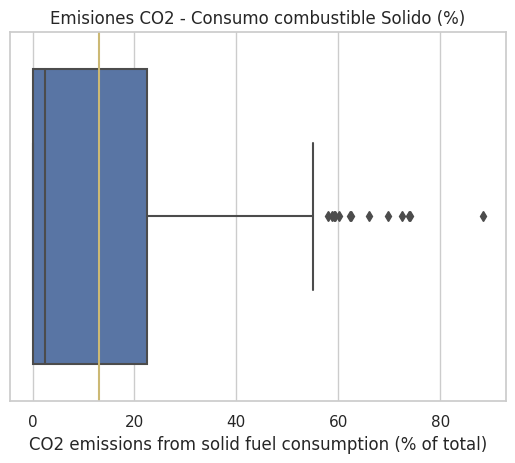

In [ ]:
# Emisiones CO2 - Consumo combustible Solido
emissions_consumption_solid = df_variables_mean_countries['CO2 emissions from solid fuel consumption (% of total)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_consumption_solid).set(title='Emisiones CO2 - Consumo combustible Solido (%)')
plt.axvline(emissions_consumption_solid.mean(), c='y')


In [ ]:
show_range(emissions_consumption_solid)

88.5

In [ ]:
frequency_table(emissions_consumption_solid,20)

CO2 emissions from solid fuel consumption (% of total)
(-0.0885, 4.425]    146
(4.425, 8.85]        21
(8.85, 13.275]       10
(13.275, 17.7]       12
(17.7, 22.125]        7
(22.125, 26.55]      10
(26.55, 30.975]      17
(30.975, 35.4]        8
(35.4, 39.825]        2
(39.825, 44.25]       4
(44.25, 48.675]       4
(48.675, 53.1]        6
(53.1, 57.525]        3
(57.525, 61.95]       5
(61.95, 66.375]       3
(66.375, 70.8]        1
(70.8, 75.225]        3
(75.225, 79.65]       0
(79.65, 84.075]       0
(84.075, 88.5]        1
Name: CO2 emissions from solid fuel consumption (% of total), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Consumo combustible Solido (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

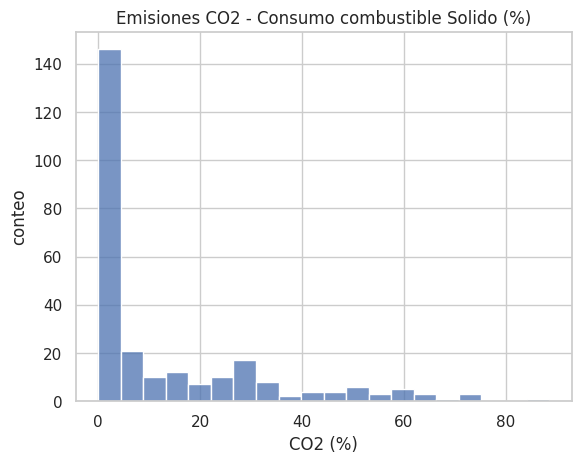

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_consumption_solid, kde=False, bins=20).set(title='Emisiones CO2 - Consumo combustible Solido (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_consumption_solid)

asimetría: 1.5988223309247513
curtosis: 1.8086206106926745


Como se puede observaren el histograma, y los valores de asimetría y curtosis obtenidos, se puede afirmar que las emisiones de Dioxido de carbono (CO2) durante la combustion de combustible solido es positiva, ya que tiene una simetría positiva pues está más extendida hacia los valores más altos. Asimismo. Sin embargo, la curtosis es achatada, lo que nos demuestra una tendencia de datos hacia la cola y alejados del centro.



### > *Emisiones CO2 - Produccion de Transporte*



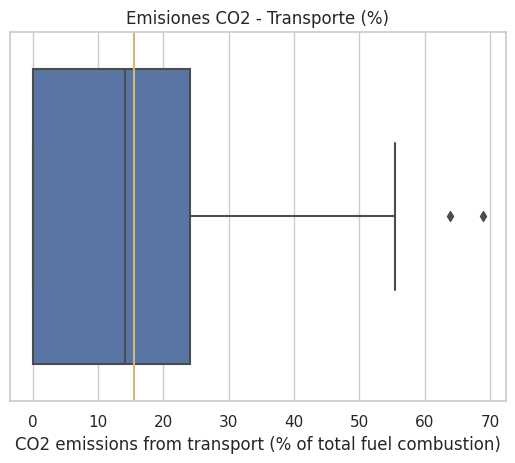

In [ ]:
# Emisiones CO2 - Produccion de Transporte
emissions_transport = df_variables_mean_countries['CO2 emissions from transport (% of total fuel combustion)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_transport).set(title='Emisiones CO2 - Transporte (%)')
plt.axvline(emissions_transport.mean(), c='y')

In [ ]:
show_range(emissions_transport)

68.99

In [ ]:
frequency_table(emissions_transport,20)

CO2 emissions from transport (% of total fuel combustion)
(-0.069, 3.449]     78
(3.449, 6.899]       6
(6.899, 10.348]     20
(10.348, 13.798]    26
(13.798, 17.248]    19
(17.248, 20.697]    28
(20.697, 24.146]    21
(24.146, 27.596]    18
(27.596, 31.045]    12
(31.045, 34.495]     8
(34.495, 37.944]    10
(37.944, 41.394]     5
(41.394, 44.843]     2
(44.843, 48.293]     1
(48.293, 51.742]     3
(51.742, 55.192]     3
(55.192, 58.641]     1
(58.641, 62.091]     0
(62.091, 65.54]      1
(65.54, 68.99]       1
Name: CO2 emissions from transport (% of total fuel combustion), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Transporte (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

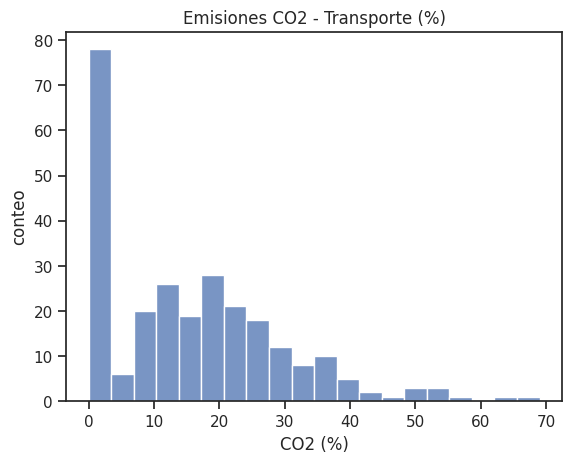

In [ ]:
sns.set(style='ticks')
sns.histplot(emissions_transport, kde=False, bins=20).set(title='Emisiones CO2 - Transporte (%)',xlabel='CO2 (%)',ylabel='conteo')

Se observa que las emisiones de Dioxido de carbono (CO2) derivado de las diferentes actividades de transporte, es positiva, ya que tiene una simetría perfecta positiva, tendiendo hacia los valores más altos. Asimismo, la curtosis es normal, lo que evidencia la distribucion de los datos.

In [ ]:
show_dispersion_params(emissions_transport)

asimetría: 0.8376710755035043
curtosis: 0.5267948420438748


### > *Emisiones CO2 - Residencial*




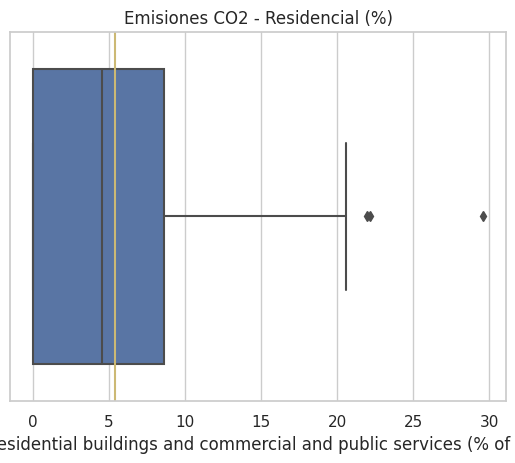

In [ ]:
 # Emisiones CO2 - Residencial
emissions_residential = df_variables_mean_countries['CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_residential).set(title='Emisiones CO2 - Residencial (%)')
plt.axvline(emissions_residential.mean(), c='y')

In [ ]:
show_range(emissions_consumption_solid)

88.5

In [ ]:
frequency_table(emissions_consumption_solid,20)

CO2 emissions from solid fuel consumption (% of total)
(-0.0885, 4.425]    146
(4.425, 8.85]        21
(8.85, 13.275]       10
(13.275, 17.7]       12
(17.7, 22.125]        7
(22.125, 26.55]      10
(26.55, 30.975]      17
(30.975, 35.4]        8
(35.4, 39.825]        2
(39.825, 44.25]       4
(44.25, 48.675]       4
(48.675, 53.1]        6
(53.1, 57.525]        3
(57.525, 61.95]       5
(61.95, 66.375]       3
(66.375, 70.8]        1
(70.8, 75.225]        3
(75.225, 79.65]       0
(79.65, 84.075]       0
(84.075, 88.5]        1
Name: CO2 emissions from solid fuel consumption (% of total), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Residencial (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

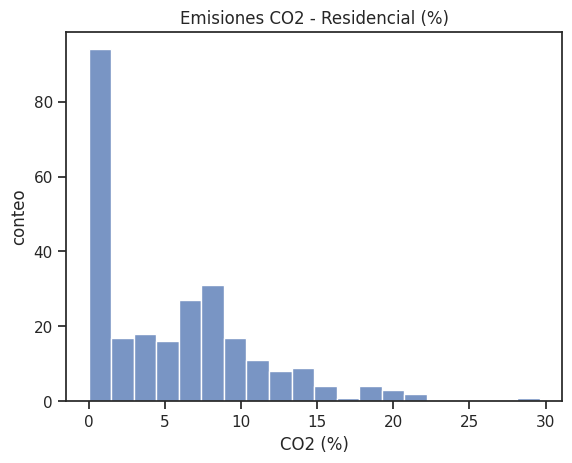

In [ ]:
sns.set(style='ticks')
sns.histplot(emissions_residential, kde=False, bins=20).set(title='Emisiones CO2 - Residencial (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_residential)

asimetría: 1.0353390796408888
curtosis: 1.1014067656226354


Para los datos de las las emisiones de Dioxido de carbono (CO2) derivado del sector residencial, obtenemos una simetria positiva, con una curtosis es achatada.

### > *Emisiones CO2 - No Residencial*

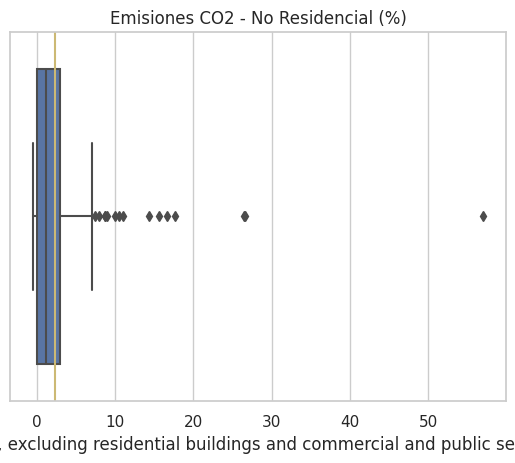

In [ ]:
 # Emisiones CO2 - No Residencial
emissions_no_residential = df_variables_mean_countries['CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_no_residential).set(title='Emisiones CO2 - No Residencial (%)')
plt.axvline(emissions_no_residential.mean(), c='y')

In [ ]:
show_range(emissions_no_residential)

57.589999999999996

In [ ]:
frequency_table(emissions_no_residential,20)

CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
(-0.608, 2.329]     177
(2.329, 5.209]       56
(5.209, 8.088]       17
(8.088, 10.968]       5
(10.968, 13.847]      1
(13.847, 16.727]      3
(16.727, 19.606]      1
(19.606, 22.486]      0
(22.486, 25.365]      0
(25.365, 28.245]      2
(28.245, 31.124]      0
(31.124, 34.004]      0
(34.004, 36.884]      0
(36.884, 39.763]      0
(39.763, 42.642]      0
(42.642, 45.522]      0
(45.522, 48.402]      0
(48.402, 51.281]      0
(51.281, 54.16]       0
(54.16, 57.04]        1
Name: CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - No Residencial (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

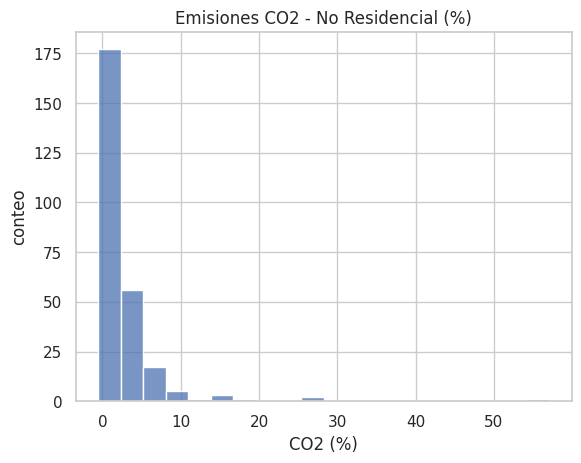

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_no_residential, kde=False, bins=20).set(title='Emisiones CO2 - No Residencial (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_no_residential)

asimetría: 6.664522463445307
curtosis: 62.38335968921385


Se evidencia que para los datos obtenidos de las emisiones del sector no residencial, presenta datos inusualmente altos en su asimetria, con una curtosis elevada, lo que nos sugiere una distribucion de datos muy atipica. Esto se puede corroborar en el boxplot, donde se evidenciaron datos muy alejados de la media.

### > *Emisiones CO2 - Manufactura*

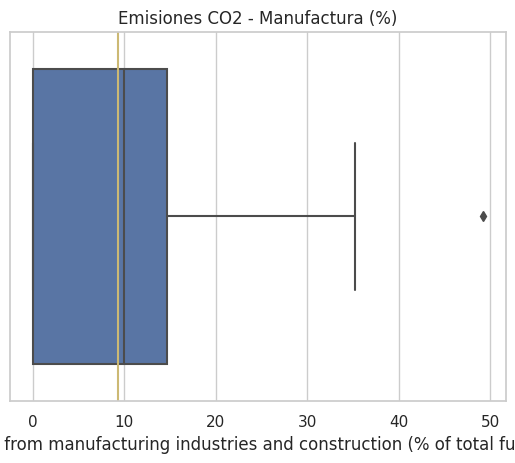

In [ ]:
 # Emisiones CO2 - Manufactura
emissions_manufacturing = df_variables_mean_countries['CO2 emissions from manufacturing industries and construction (% of total fuel combustion)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_manufacturing).set(title='Emisiones CO2 - Manufactura (%)')
plt.axvline(emissions_manufacturing.mean(), c='y')

In [ ]:
show_range(emissions_manufacturing)

49.27

In [ ]:
frequency_table(emissions_manufacturing,20)

CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
(-0.0493, 2.464]    84
(2.464, 4.927]       8
(4.927, 7.391]      14
(7.391, 9.854]      23
(9.854, 12.318]     44
(12.318, 14.781]    24
(14.781, 17.245]    23
(17.245, 19.708]    19
(19.708, 22.172]    11
(22.172, 24.635]     6
(24.635, 27.098]     3
(27.098, 29.562]     0
(29.562, 32.026]     1
(32.026, 34.489]     1
(34.489, 36.952]     1
(36.952, 39.416]     0
(39.416, 41.88]      0
(41.88, 44.343]      0
(44.343, 46.807]     0
(46.807, 49.27]      1
Name: CO2 emissions from manufacturing industries and construction (% of total fuel combustion), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Manufactura (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

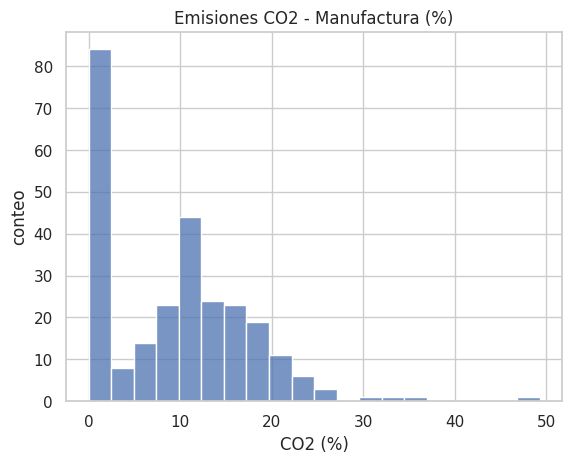

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_manufacturing, kde=False, bins=20).set(title='Emisiones CO2 - Manufactura (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_manufacturing)

asimetría: 0.7374319131152678
curtosis: 1.2680524381803755


Se observa que para los datos obtenidos de las emisiones de CO2 globales, producto de las actividades de manufactura y construccion, tienden a una simetria perfecta, y una curtosis achatada, lo que representa que los datos estan distribuidos hacia la mediana, lo que nos permite inferir que los paises evaluados tuvieron datos con uan distribucion normal.

### > *Emisiones CO2 - Consumo combustible Liquido*



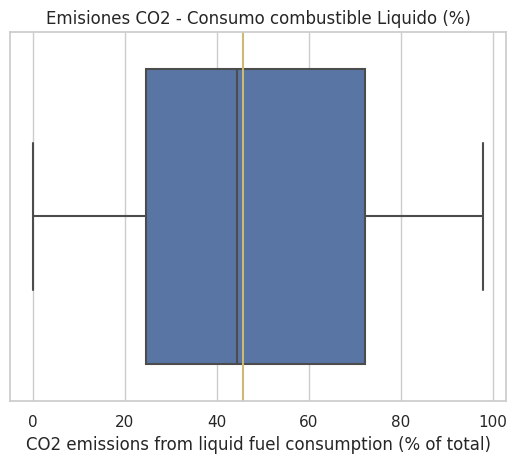

In [ ]:
# Emisiones CO2 - Consumo combustible Liquido
emissions_consumption_liquid = df_variables_mean_countries['CO2 emissions from liquid fuel consumption (% of total)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_consumption_liquid).set(title='Emisiones CO2 - Consumo combustible Liquido (%)')
plt.axvline(emissions_consumption_liquid.mean(), c='y')

In [ ]:
show_range(emissions_consumption_liquid)

97.91

In [ ]:
frequency_table(emissions_consumption_liquid,20)

CO2 emissions from liquid fuel consumption (% of total)
(-0.0979, 4.896]    29
(4.896, 9.791]       2
(9.791, 14.686]      9
(14.686, 19.582]     9
(19.582, 24.478]    17
(24.478, 29.373]    21
(29.373, 34.268]     8
(34.268, 39.164]    19
(39.164, 44.06]     16
(44.06, 48.955]     10
(48.955, 53.851]    17
(53.851, 58.746]    11
(58.746, 63.642]     8
(63.642, 68.537]    12
(68.537, 73.432]    17
(73.432, 78.328]    18
(78.328, 83.224]    27
(83.224, 88.119]     8
(88.119, 93.014]     2
(93.014, 97.91]      3
Name: CO2 emissions from liquid fuel consumption (% of total), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Consumo combustible Liquido (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

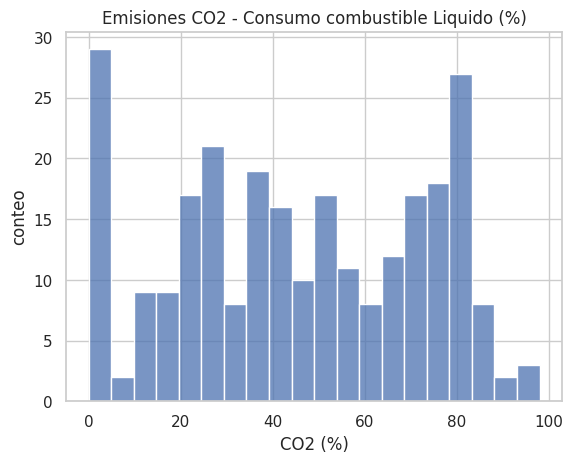

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_consumption_liquid, kde=False, bins=20).set(title='Emisiones CO2 - Consumo combustible Liquido (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_consumption_liquid)

asimetría: -0.11234595197583334
curtosis: -1.1578937303599548


Para el caso de las emisiones por consumo de combustible liquido, claramente evidenciamos un asimetria muy cercana a 0, auunque negativa nos significa una distribuacion de datos relativamente simetrica, sin embargo, el valor negativo indica que la su cola izquierda es un poco mas larga, se puede afirmar que es moderada. Lo que es corroborado con el valor obtenido en curtosis que es un indicador de una distribucion platicurtica, lo que sugiere menos concentraacion de datos en las colas y valores mas hacia el centro. Se podria afirmar que los diferentes paises tienen emisiones moderadamente similares.



### > *Emisiones CO2 - Consumo combustible Gaseoso*

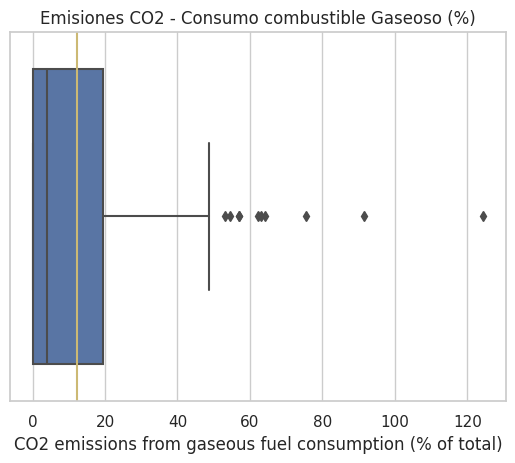

In [ ]:
 # Emisiones CO2 - Consumo combustible Gaseoso
emissions_consumption_gaseous = df_variables_mean_countries['CO2 emissions from gaseous fuel consumption (% of total)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_consumption_gaseous).set(title='Emisiones CO2 - Consumo combustible Gaseoso (%)')
plt.axvline(emissions_consumption_gaseous.mean(), c='y')

In [ ]:
show_range(emissions_consumption_gaseous)

124.44

In [ ]:
frequency_table(emissions_consumption_gaseous,20)

CO2 emissions from gaseous fuel consumption (% of total)
(-0.124, 6.222]       141
(6.222, 12.444]        24
(12.444, 18.666]       27
(18.666, 24.888]       21
(24.888, 31.11]        15
(31.11, 37.332]        16
(37.332, 43.554]        4
(43.554, 49.776]        5
(49.776, 55.998]        2
(55.998, 62.22]         3
(62.22, 68.442]         2
(68.442, 74.664]        0
(74.664, 80.886]        1
(80.886, 87.108]        0
(87.108, 93.33]         1
(93.33, 99.552]         0
(99.552, 105.774]       0
(105.774, 111.996]      0
(111.996, 118.218]      0
(118.218, 124.44]       1
Name: CO2 emissions from gaseous fuel consumption (% of total), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Consumo combustible Gaseoso (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

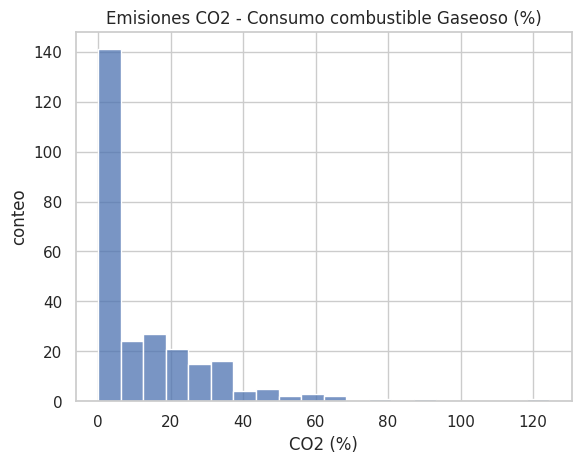

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_consumption_gaseous, kde=False, bins=20).set(title='Emisiones CO2 - Consumo combustible Gaseoso (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_consumption_gaseous)

asimetría: 2.2753916065374113
curtosis: 7.838286412254213


Se evidencia que para los datos obtenidos de las emisiones por consumo combustible gaseoso, presenta una simetria positiva que tiende a tener una cola mas larga y pesada del lado derecho, y una curtosis achatada, lo quer nos permite evidenciar datos muy similares y cercanos a la mediana, pero con algunos datos atipicos que se alejan de la misma. Lo cual, nos permite afirmar que los paisen en general tienen bajas emisiones para el consumo de combustible gaseoso.

### > *Emisiones CO2 - Electricidad*

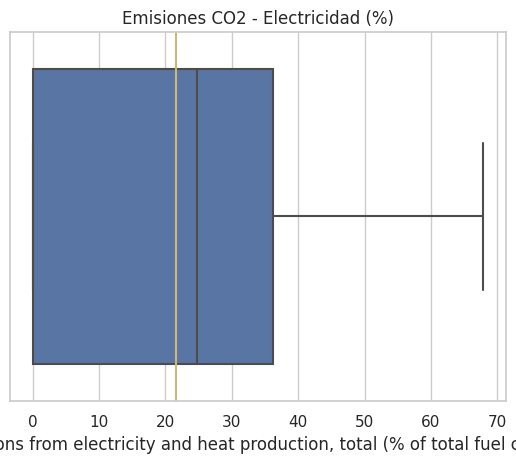

In [ ]:
 # Emisiones CO2 - Electricidad
emissions_electricity = df_variables_mean_countries['CO2 emissions from electricity and heat production, total (% of total fuel combustion)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_electricity).set(title='Emisiones CO2 - Electricidad (%)')
plt.axvline(emissions_electricity.mean(), c='y')

In [ ]:
show_range(emissions_electricity)

67.91

In [ ]:
frequency_table(emissions_electricity,20)

CO2 emissions from electricity and heat production, total (% of total fuel combustion)
(-0.0679, 3.395]    85
(3.395, 6.791]       4
(6.791, 10.186]      5
(10.186, 13.582]     9
(13.582, 16.978]     6
(16.978, 20.373]    10
(20.373, 23.768]     9
(23.768, 27.164]    16
(27.164, 30.559]    21
(30.559, 33.955]    15
(33.955, 37.35]     26
(37.35, 40.746]     17
(40.746, 44.141]    15
(44.141, 47.537]     6
(47.537, 50.932]     6
(50.932, 54.328]     8
(54.328, 57.723]     2
(57.723, 61.119]     2
(61.119, 64.514]     0
(64.514, 67.91]      1
Name: CO2 emissions from electricity and heat production, total (% of total fuel combustion), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Electricidad (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

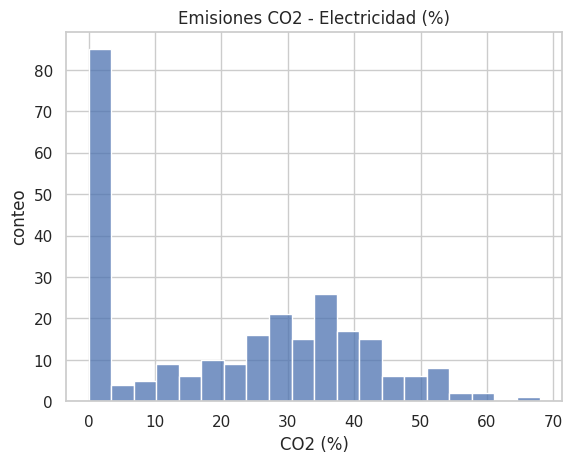

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_electricity, kde=False, bins=20).set(title='Emisiones CO2 - Electricidad (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_electricity)

asimetría: 0.12604272836642602
curtosis: -1.218963652295296


Para las emisiones producto del sector electrico, evidenciamos una distribucion perfecta con tendencia a una distribucion normal.Sin embargo, el dato obtenido en curtosis nos evidencia que la distribucion de estos datos tiende a colas mas ligeras. La distribución es platicúrtica, lo que significa que tiene menos concentración de datos en las colas y más en el centro en comparación con una distribución normal.

### > *Emisiones CO2 - Total de gases de efecto invernadero*

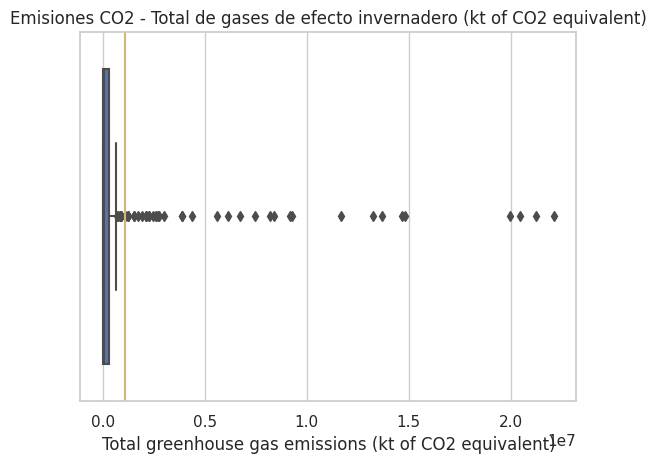

In [ ]:
 # Emisiones CO2 - Total de gases de efecto invernadero
emissions_total_greenhouse = df_variables_mean_countries['Total greenhouse gas emissions (kt of CO2 equivalent)']
sns.set(style="whitegrid")
sns.boxplot(x=emissions_total_greenhouse).set(title='Emisiones CO2 - Total de gases de efecto invernadero (kt of CO2 equivalent)')
plt.axvline(emissions_total_greenhouse.mean(), c='y')

datos ANTES del filtro:
Mediana: 32341.905
Media: 1093345.2242748092
Desviación std: 3392669.15467333

datos DESPUÉS del filtro:
Mediana: 20169.69
Media: 74245.87558139535
Desviación std: 133978.71035282747



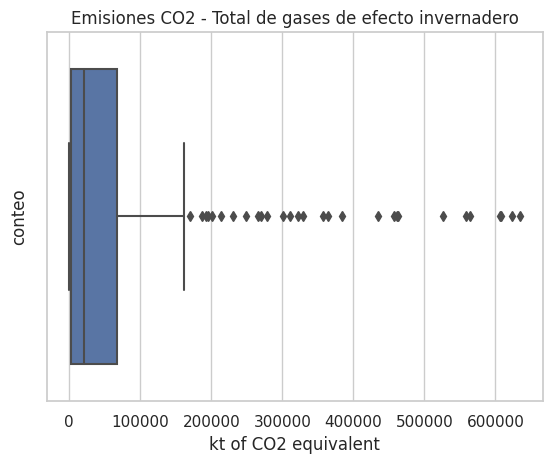

In [ ]:
fires_by_km2_filtered = delete_outliers(emissions_total_greenhouse)
print('datos ANTES del filtro:')
show_summary_values(emissions_total_greenhouse)
sns.boxplot(x=fires_by_km2_filtered).set(title='Emisiones CO2 - Total de gases de efecto invernadero',xlabel='kt of CO2 equivalent',ylabel='conteo');
print('\ndatos DESPUÉS del filtro:')
show_summary_values(fires_by_km2_filtered)
print()

In [ ]:
show_range(emissions_total_greenhouse)

22129540.19

In [ ]:
frequency_table(emissions_total_greenhouse,20)

Total greenhouse gas emissions (kt of CO2 equivalent)
(-22129.54, 1106477.01]         224
(1106477.01, 2212954.019]        10
(2212954.019, 3319431.029]        8
(3319431.029, 4425908.038]        3
(4425908.038, 5532385.048]        0
(5532385.048, 6638862.057]        2
(6638862.057, 7745339.067]        2
(7745339.067, 8851816.076]        2
(8851816.076, 9958293.086]        2
(9958293.086, 11064770.095]       0
(11064770.095, 12171247.105]      1
(12171247.105, 13277724.114]      1
(13277724.114, 14384201.124]      1
(14384201.124, 15490678.133]      2
(15490678.133, 16597155.143]      0
(16597155.143, 17703632.152]      0
(17703632.152, 18810109.162]      0
(18810109.162, 19916586.171]      0
(19916586.171, 21023063.181]      2
(21023063.181, 22129540.19]       2
Name: Total greenhouse gas emissions (kt of CO2 equivalent), dtype: int64

[Text(0.5, 1.0, 'Emisiones CO2 - Total de gases de efecto invernadero (%)'),
 Text(0.5, 0, 'CO2 (%)'),
 Text(0, 0.5, 'conteo')]

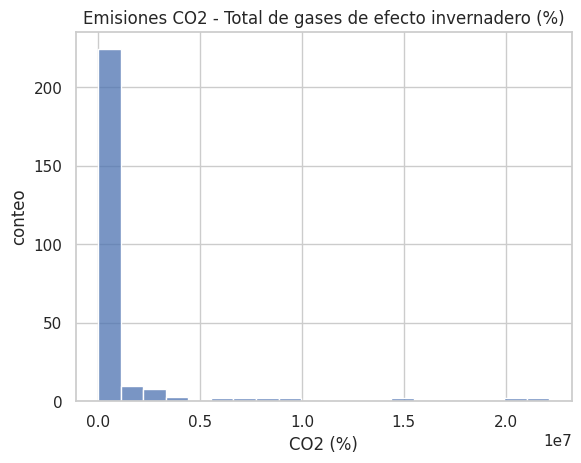

In [ ]:
sns.set(style='whitegrid')
sns.histplot(emissions_total_greenhouse, kde=False, bins=20).set(title='Emisiones CO2 - Total de gases de efecto invernadero (%)',xlabel='CO2 (%)',ylabel='conteo')

In [ ]:
show_dispersion_params(emissions_total_greenhouse)
#kdeplot

asimetría: nan
curtosis: nan


Se obtuvieron valores nan, y debido al comportaamiento que es evidente en el histograma y el boxplot, se puede evidenciar distribucion de datos muy atipicos y alejados de la mediana, probablemente esto sea debido a la cantidad de datos que se evidencian en 0.

### Distribucion

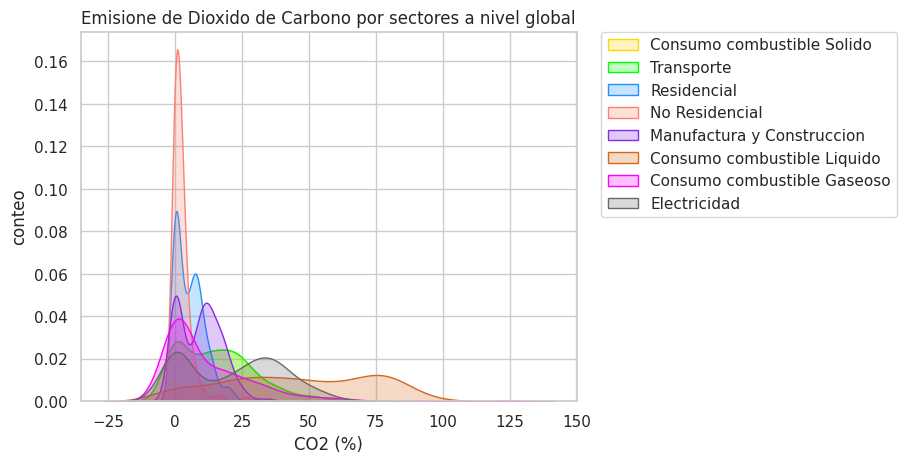

In [ ]:
ax = sns.kdeplot(emissions_transport, fill=True, color="gold", label='Consumo combustible Solido');
sns.kdeplot(emissions_transport, fill=True, color="lime", label='Transporte');
sns.kdeplot(emissions_residential, fill=True, color="dodgerblue", label='Residencial');
sns.kdeplot(emissions_no_residential, fill=True, color="salmon", label='No Residencial');
sns.kdeplot(emissions_manufacturing, fill=True, color="blueviolet", label='Manufactura y Construccion');
sns.kdeplot(emissions_consumption_liquid, fill=True, color="chocolate", label='Consumo combustible Liquido');
sns.kdeplot(emissions_consumption_gaseous, fill=True, color="magenta", label='Consumo combustible Gaseoso');
sns.kdeplot(emissions_electricity, fill=True, color="dimgrey", label='Electricidad');

ax.set(title='Emisione de Dioxido de Carbono por sectores a nivel global',xlabel='CO2 (%)',ylabel='conteo');
ax.legend(loc='upper right');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

En esta grafica de densidad kernel, evidenciamos que el sector que presento una curtosis elevada es el No Residencial, probablemente sea la inestabilida de los datos obtenidos, sin embargo, es evidente que los datos de emisiones mas constantes los encontramos en la emisiones producidas por la combustion de combustible liquido, y que para los demas sectores se ubican en valores entre 0 y 25 %.

##3. Exploración de Variables Categóricas y Análisis Multivariable

### Grafico de Tablas

In [ ]:
columns = [
            'CO2 emissions from transport (% of total fuel combustion)',
            'CO2 emissions from solid fuel consumption (% of total)',
            'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
            'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
            'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
            'CO2 emissions from liquid fuel consumption (% of total)',
            'CO2 emissions from gaseous fuel consumption (% of total)',
            'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
          ]
emissions_co2 = df_variables_mean_countries.groupby('country')[columns].sum()
emissions_co2.index

Index(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=263)

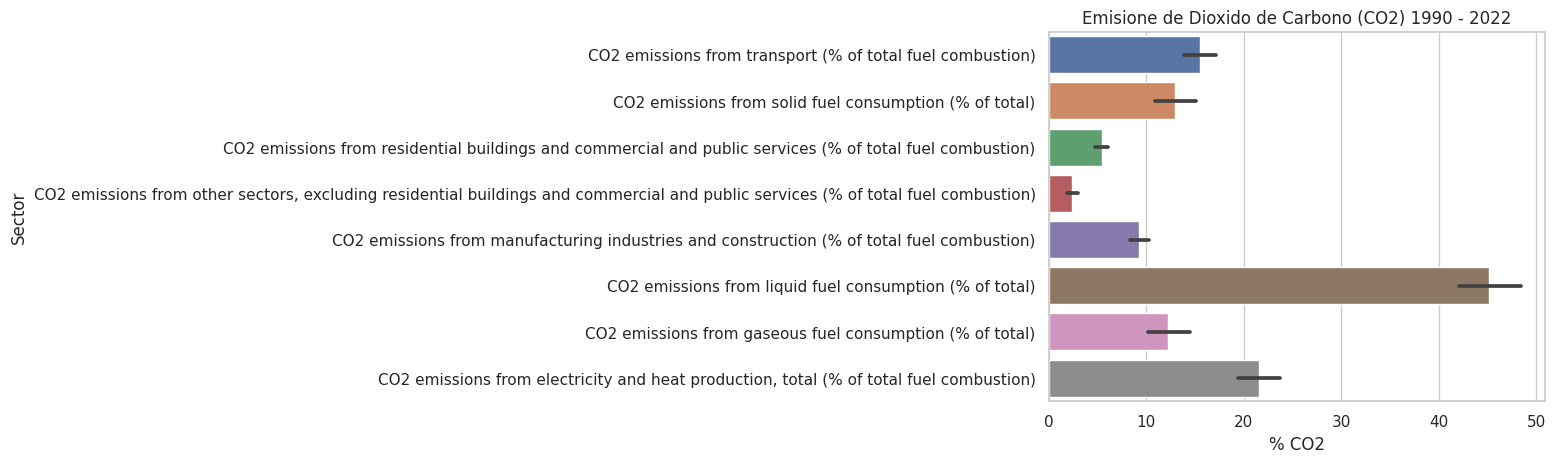

In [ ]:
ax = sns.barplot(data=emissions_co2, orient='h');
ax.set_title('Emisione de Dioxido de Carbono (CO2) 1990 - 2022')
ax.set(ylabel='Sector',xlabel='% CO2');

Se puede evidenciar que el sector que ha tenido mayor porcentaje de emision de CO2 a nivel mundial durante la ultima decada ha sido, el consumo de combustible liquido, lo cual es muy preciso, puesto expone el dinamismo de la poblacion y su necesidad por desplazarse no solo terrestre sino aereo y maritimo. Ademas del crecimiento poblacional y desarrollo de  los paises, donde dia a dia el vehiculo se ha vuelto una necesidad, y un gran pocentaje de los vehiculos y transporte de todo tipo son convencionales de gasolina y diesel.

In [ ]:
df_countries

country,variable,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,CO2 emissions (kt),4670.40,438495.54,149103.91,3760.64,102456.20,0.0,469.74,17886.87,360.80,...,5728.78,112185.80,98.56,130961.97,113348.91,0.0,0.0,15458.42,3216.92,11991.57
1,CO2 emissions from electricity and heat produc...,0.00,47.30,22.95,9.09,34.10,0.0,0.00,11.12,0.00,...,15.88,30.23,0.00,30.26,20.53,0.0,0.0,23.88,4.09,37.53
2,CO2 emissions from gaseous fuel consumption (%...,15.04,1.48,13.23,1.86,46.38,0.0,0.00,6.90,0.00,...,1.10,62.13,0.00,31.90,5.78,0.0,0.0,1.94,0.00,0.00
3,CO2 emissions from liquid fuel consumption (% ...,50.66,19.62,42.67,67.45,32.38,0.0,84.25,35.41,85.65,...,79.47,10.69,79.36,51.80,32.84,0.0,0.0,77.82,57.94,19.72
4,CO2 emissions from manufacturing industries an...,0.00,11.73,8.30,16.52,8.16,0.0,0.00,23.15,0.00,...,9.32,8.52,0.00,20.60,26.32,0.0,0.0,7.17,35.28,14.24
5,"CO2 emissions from other sectors, excluding re...",0.00,1.88,2.62,8.72,0.67,0.0,0.00,0.18,0.00,...,8.00,11.03,0.00,0.18,2.06,0.0,0.0,6.99,3.51,10.52
6,CO2 emissions from residential buildings and c...,0.00,4.51,7.26,8.19,11.59,0.0,0.00,16.96,0.00,...,8.79,22.19,0.00,3.56,9.77,0.0,0.0,10.41,5.02,4.05
7,CO2 emissions from solid fuel consumption (% o...,14.54,74.17,0.42,8.28,1.91,0.0,0.00,0.00,0.00,...,0.06,3.68,0.00,0.40,36.28,0.0,0.0,0.54,15.02,57.97
8,CO2 emissions from transport (% of total fuel ...,0.00,12.71,37.00,35.63,23.61,0.0,0.00,26.72,0.00,...,36.06,6.15,0.00,23.54,19.45,0.0,0.0,29.68,30.17,11.78
9,Total greenhouse gas emissions (kt of CO2 equi...,20149.14,1081342.04,623770.69,8345.01,187525.19,0.0,547.89,64479.93,750.47,...,33692.52,169332.00,595.67,357715.90,201604.88,0.0,0.0,32187.14,27624.86,28257.14


In [ ]:
df_filtered = df_countries.drop([0, 9]).reset_index(drop=True)
df_filtered['variable']

0    CO2 emissions from electricity and heat produc...
1    CO2 emissions from gaseous fuel consumption (%...
2    CO2 emissions from liquid fuel consumption (% ...
3    CO2 emissions from manufacturing industries an...
4    CO2 emissions from other sectors, excluding re...
5    CO2 emissions from residential buildings and c...
6    CO2 emissions from solid fuel consumption (% o...
7    CO2 emissions from transport (% of total fuel ...
Name: variable, dtype: object

Text(0.5, 0.98, 'Emisiones CO2')

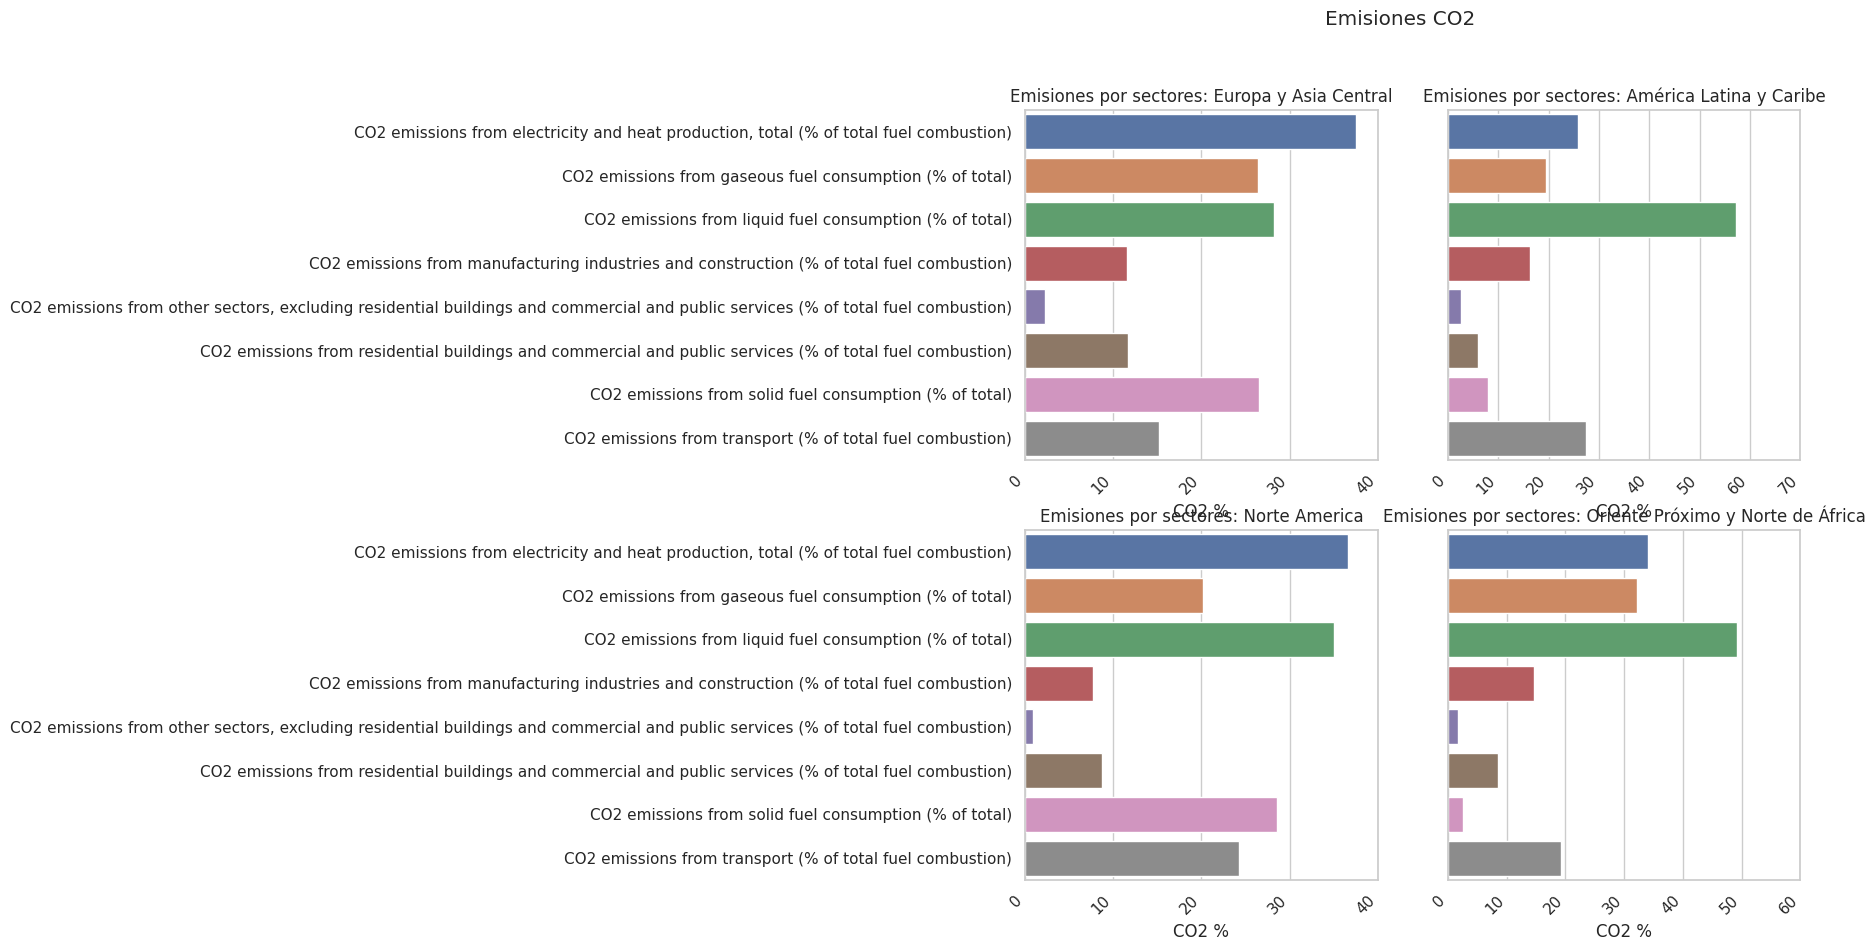

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=False, sharey=True)

sns.barplot(x=df_filtered['Europe & Central Asia'], y=df_filtered['variable'], ax=axes[0][0])
sns.barplot(x=df_filtered['Latin America & Caribbean'], y=df_filtered['variable'], ax=axes[0][1])
sns.barplot(x=df_filtered['North America'], y=df_filtered['variable'], ax=axes[1][0])
sns.barplot(x=df_filtered['Middle East & North Africa'], y=df_filtered['variable'], ax=axes[1][1])

# Rotar los nombres de las variables en el eje x
for ax_row in axes:
    for ax in ax_row:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

axes[0][0].set(xlabel='CO2 %', ylabel='', title="Emisiones por sectores: Europa y Asia Central")
axes[0][1].set(xlabel='CO2 %', ylabel='', title="Emisiones por sectores: América Latina y Caribe")
axes[1][0].set(xlabel='CO2 %', ylabel='', title="Emisiones por sectores: Norte America")
axes[1][1].set(xlabel='CO2 %', ylabel='', title="Emisiones por sectores: Oriente Próximo y Norte de África")

fig.suptitle("Emisiones CO2")

En estos graficos multiples, se comparan los datos de las emisiones agrupadas en 4 regiones del mundo, America del Norte, Oriente Próximo y Norte de África, América Latina y el Caribe, y Europa y Asia Central.
Se puede evidenciar que mantienen el mismo comportamiento, de los sectores que producen emisiones. De igual manera, se observa que las regiones con valores mas altos, son Norte America y Europa y Asia Central, lo que prodria ser derivado de su extension y poblacion que es mucho mayor de las otras dos regiones evaluadas.
Asimismo, se observa que el sector que tiende a producir mas emisiones de CO2 es el consumo de combustible liquido; adicionalmente, este sector tiene un valor mucho mas elevado para la region de America Latina y el Caribe, lo cual puede deberse al uso masivo de vehiculos de combustible y la baja insercion y uso de vehiculos electricos.

## 4. Correlaciones y Regresión Linear Simple

Se genero una nueva tabla con los valores promediados para los diferentes sectiores en evaluacion vs los años evaluados, en este caso tomaremos de 1990 a 2016, debido a la falta de datos para los ultimos 6 años.

In [ ]:
df_variables_mean_countries
columns_to_drop = ['CO2 emissions (kt)', 'Total greenhouse gas emissions (kt of CO2 equivalent)']
df_variables_mean_countries_filtered = df_variables_mean_countries.drop(columns=columns_to_drop)
df_variables_mean_countries_filtered


variable,country,"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from transport (% of total fuel combustion)
0,Afghanistan,0.00,15.04,50.66,0.00,0.00,0.00,14.54,0.00
1,Africa Eastern and Southern,47.30,1.48,19.62,11.73,1.88,4.51,74.17,12.71
2,Africa Western and Central,22.95,13.23,42.67,8.30,2.62,7.26,0.42,37.00
3,Albania,9.09,1.86,67.45,16.52,8.72,8.19,8.28,35.63
4,Algeria,34.10,46.38,32.38,8.16,0.67,11.59,1.91,23.61
...,...,...,...,...,...,...,...,...,...
258,Virgin Islands (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
259,West Bank and Gaza,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
260,"Yemen, Rep.",23.88,1.94,77.82,7.17,6.99,10.41,0.54,29.68
261,Zambia,4.09,0.00,57.94,35.28,3.51,5.02,15.02,30.17


Coeficiente de correlacion

Correlación: 0.22895556851957993


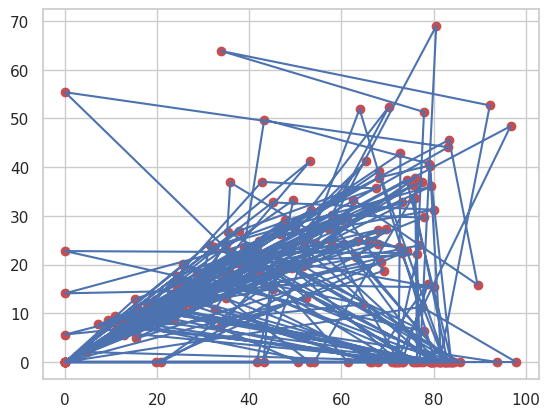

In [ ]:

arr_1_1 = df_variables_mean_countries_filtered['CO2 emissions from liquid fuel consumption (% of total)']
arr_1_2 = df_variables_mean_countries_filtered['CO2 emissions from transport (% of total fuel combustion)']

plt.scatter(arr_1_1, arr_1_2, c="r")
plt.plot(arr_1_1, arr_1_2)

print(f"Correlación: {arr_1_1.corr(arr_1_2)}")

In [ ]:
print("Correlación entre la emision de Dioxido de Carbono por consumo de combustible liquido y el sector de transporte: "+str(df_variables_mean_countries_filtered['CO2 emissions from transport (% of total fuel combustion)'].corr(df_variables_mean_countries_filtered['CO2 emissions from liquid fuel consumption (% of total)'])))

Correlación entre la emision de Dioxido de Carbono por consumo de combustible liquido y el sector de transporte: 0.2289555685195799


Graficas de dispersion

<Axes: xlabel='CO2 emissions from liquid fuel consumption (% of total)', ylabel='CO2 emissions from transport (% of total fuel combustion)'>

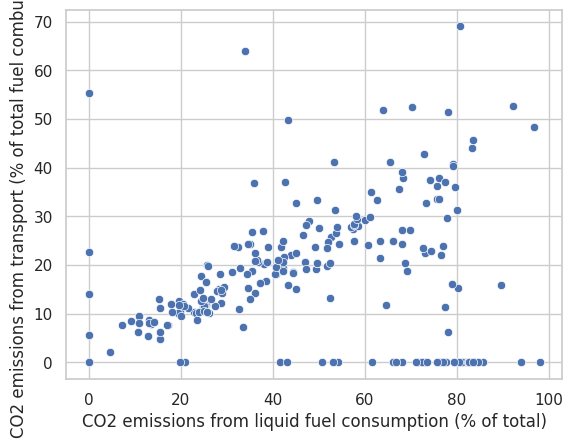

In [ ]:
sns.scatterplot(x=df_variables_mean_countries_filtered['CO2 emissions from liquid fuel consumption (% of total)'], y=df_variables_mean_countries_filtered['CO2 emissions from transport (% of total fuel combustion)'])

Se puede evidencia que existe correlacion entre los sectores transporte y consumo de combustible liquid. Sin embargo, esto no refiere la existencia de causalidad entre las dos mediciones, pues pueden exitir otros factores que desconocemos para dicho resultado.

Ahora, se puede observar en la siguiente tabla las correlacion entre las variables, con lo cual, se evidencia la baja correlacion entre las emisiones por sectores.

In [ ]:
df_variables_mean_countries_filtered.corr()

<ipython-input-340-2832d580d073>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_variables_mean_countries_filtered.corr()


variable,"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from manufacturing industries and construction (% of total fuel combustion),"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from transport (% of total fuel combustion)
variable,,,,,,,,
"CO2 emissions from electricity and heat production, total (% of total fuel combustion)",1.000000,0.526743,-0.307333,0.509029,0.066678,0.371215,0.498640,0.227443
CO2 emissions from gaseous fuel consumption (% of total),0.526743,1.000000,-0.249069,0.313298,0.130539,0.335947,-0.044233,0.085099
CO2 emissions from liquid fuel consumption (% of total),-0.307333,-0.249069,1.000000,-0.129750,-0.010110,-0.072906,-0.396052,0.228956
CO2 emissions from manufacturing industries and construction (% of total fuel combustion),0.509029,0.313298,-0.129750,1.000000,0.226635,0.453593,0.426532,0.414265
"CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",0.066678,0.130539,-0.010110,0.226635,1.000000,0.120252,0.105172,0.187201
CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion),0.371215,0.335947,-0.072906,0.453593,0.120252,1.000000,0.167139,0.476786
CO2 emissions from solid fuel consumption (% of total),0.498640,-0.044233,-0.396052,0.426532,0.105172,0.167139,1.000000,-0.063301
CO2 emissions from transport (% of total fuel combustion),0.227443,0.085099,0.228956,0.414265,0.187201,0.476786,-0.063301,1.000000


<ipython-input-341-457acf1d794c>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_variables_mean_countries_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=etiquetas_x, yticklabels=etiquetas_x)


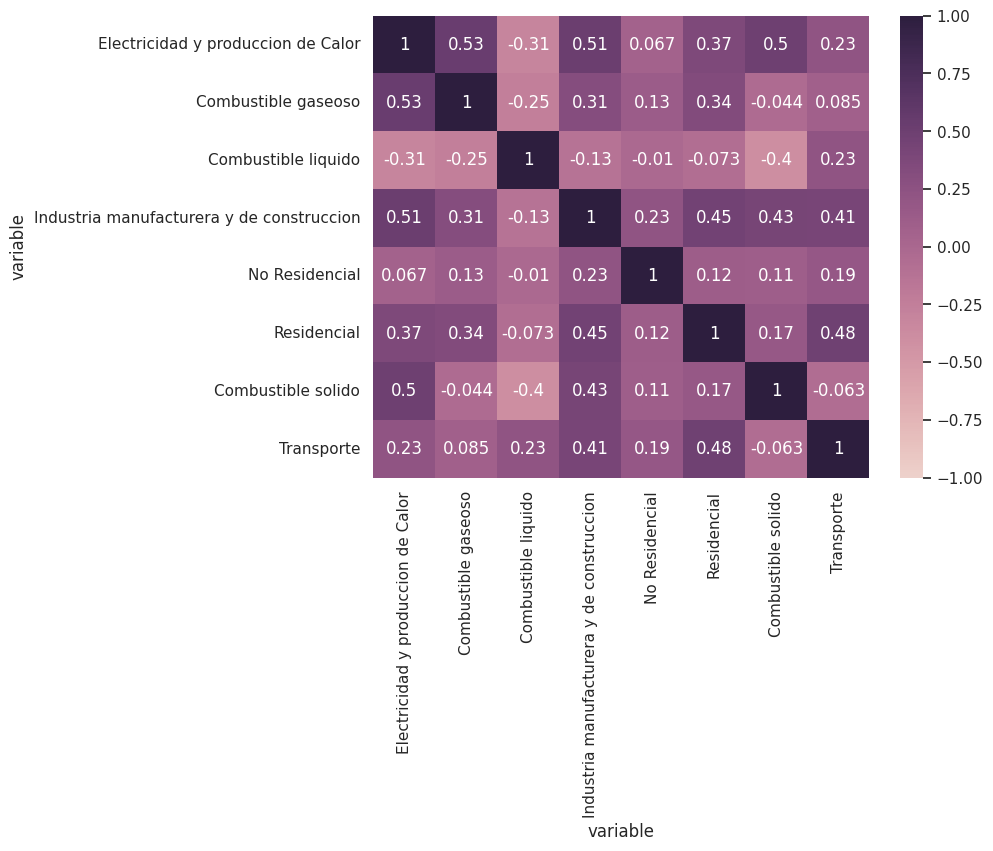

In [ ]:
plt.figure(figsize=(8,6))
etiquetas_x = [
    'Electricidad y produccion de Calor',
    'Combustible gaseoso',
    'Combustible liquido',
    'Industria manufacturera y de construccion',
    'No Residencial',
    'Residencial',
    'Combustible solido',
    'Transporte',
]
# xticklabels=etiquetas_x, yticklabels=etiquetas_x

ax = sns.heatmap(df_variables_mean_countries_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=etiquetas_x, yticklabels=etiquetas_x)

In [ ]:
rename_columns = {
    'CO2 emissions from transport (% of total fuel combustion)': 'transporte',
    'CO2 emissions from solid fuel consumption (% of total)': 'combustible_solid',
    'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)': 'residencial',
    'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)': 'no_residencial',
    'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)': 'industria_manufacturera_y_construccion',
    'CO2 emissions from liquid fuel consumption (% of total)': 'combustible_liquido',
    'CO2 emissions from gaseous fuel consumption (% of total)': 'combustible_gaseoso',
    'CO2 emissions from electricity and heat production, total (% of total fuel combustion)': 'electricidad_y_produccion_calor',
}

df_variables_mean_countries_filtered.rename(columns=rename_columns, inplace=True)

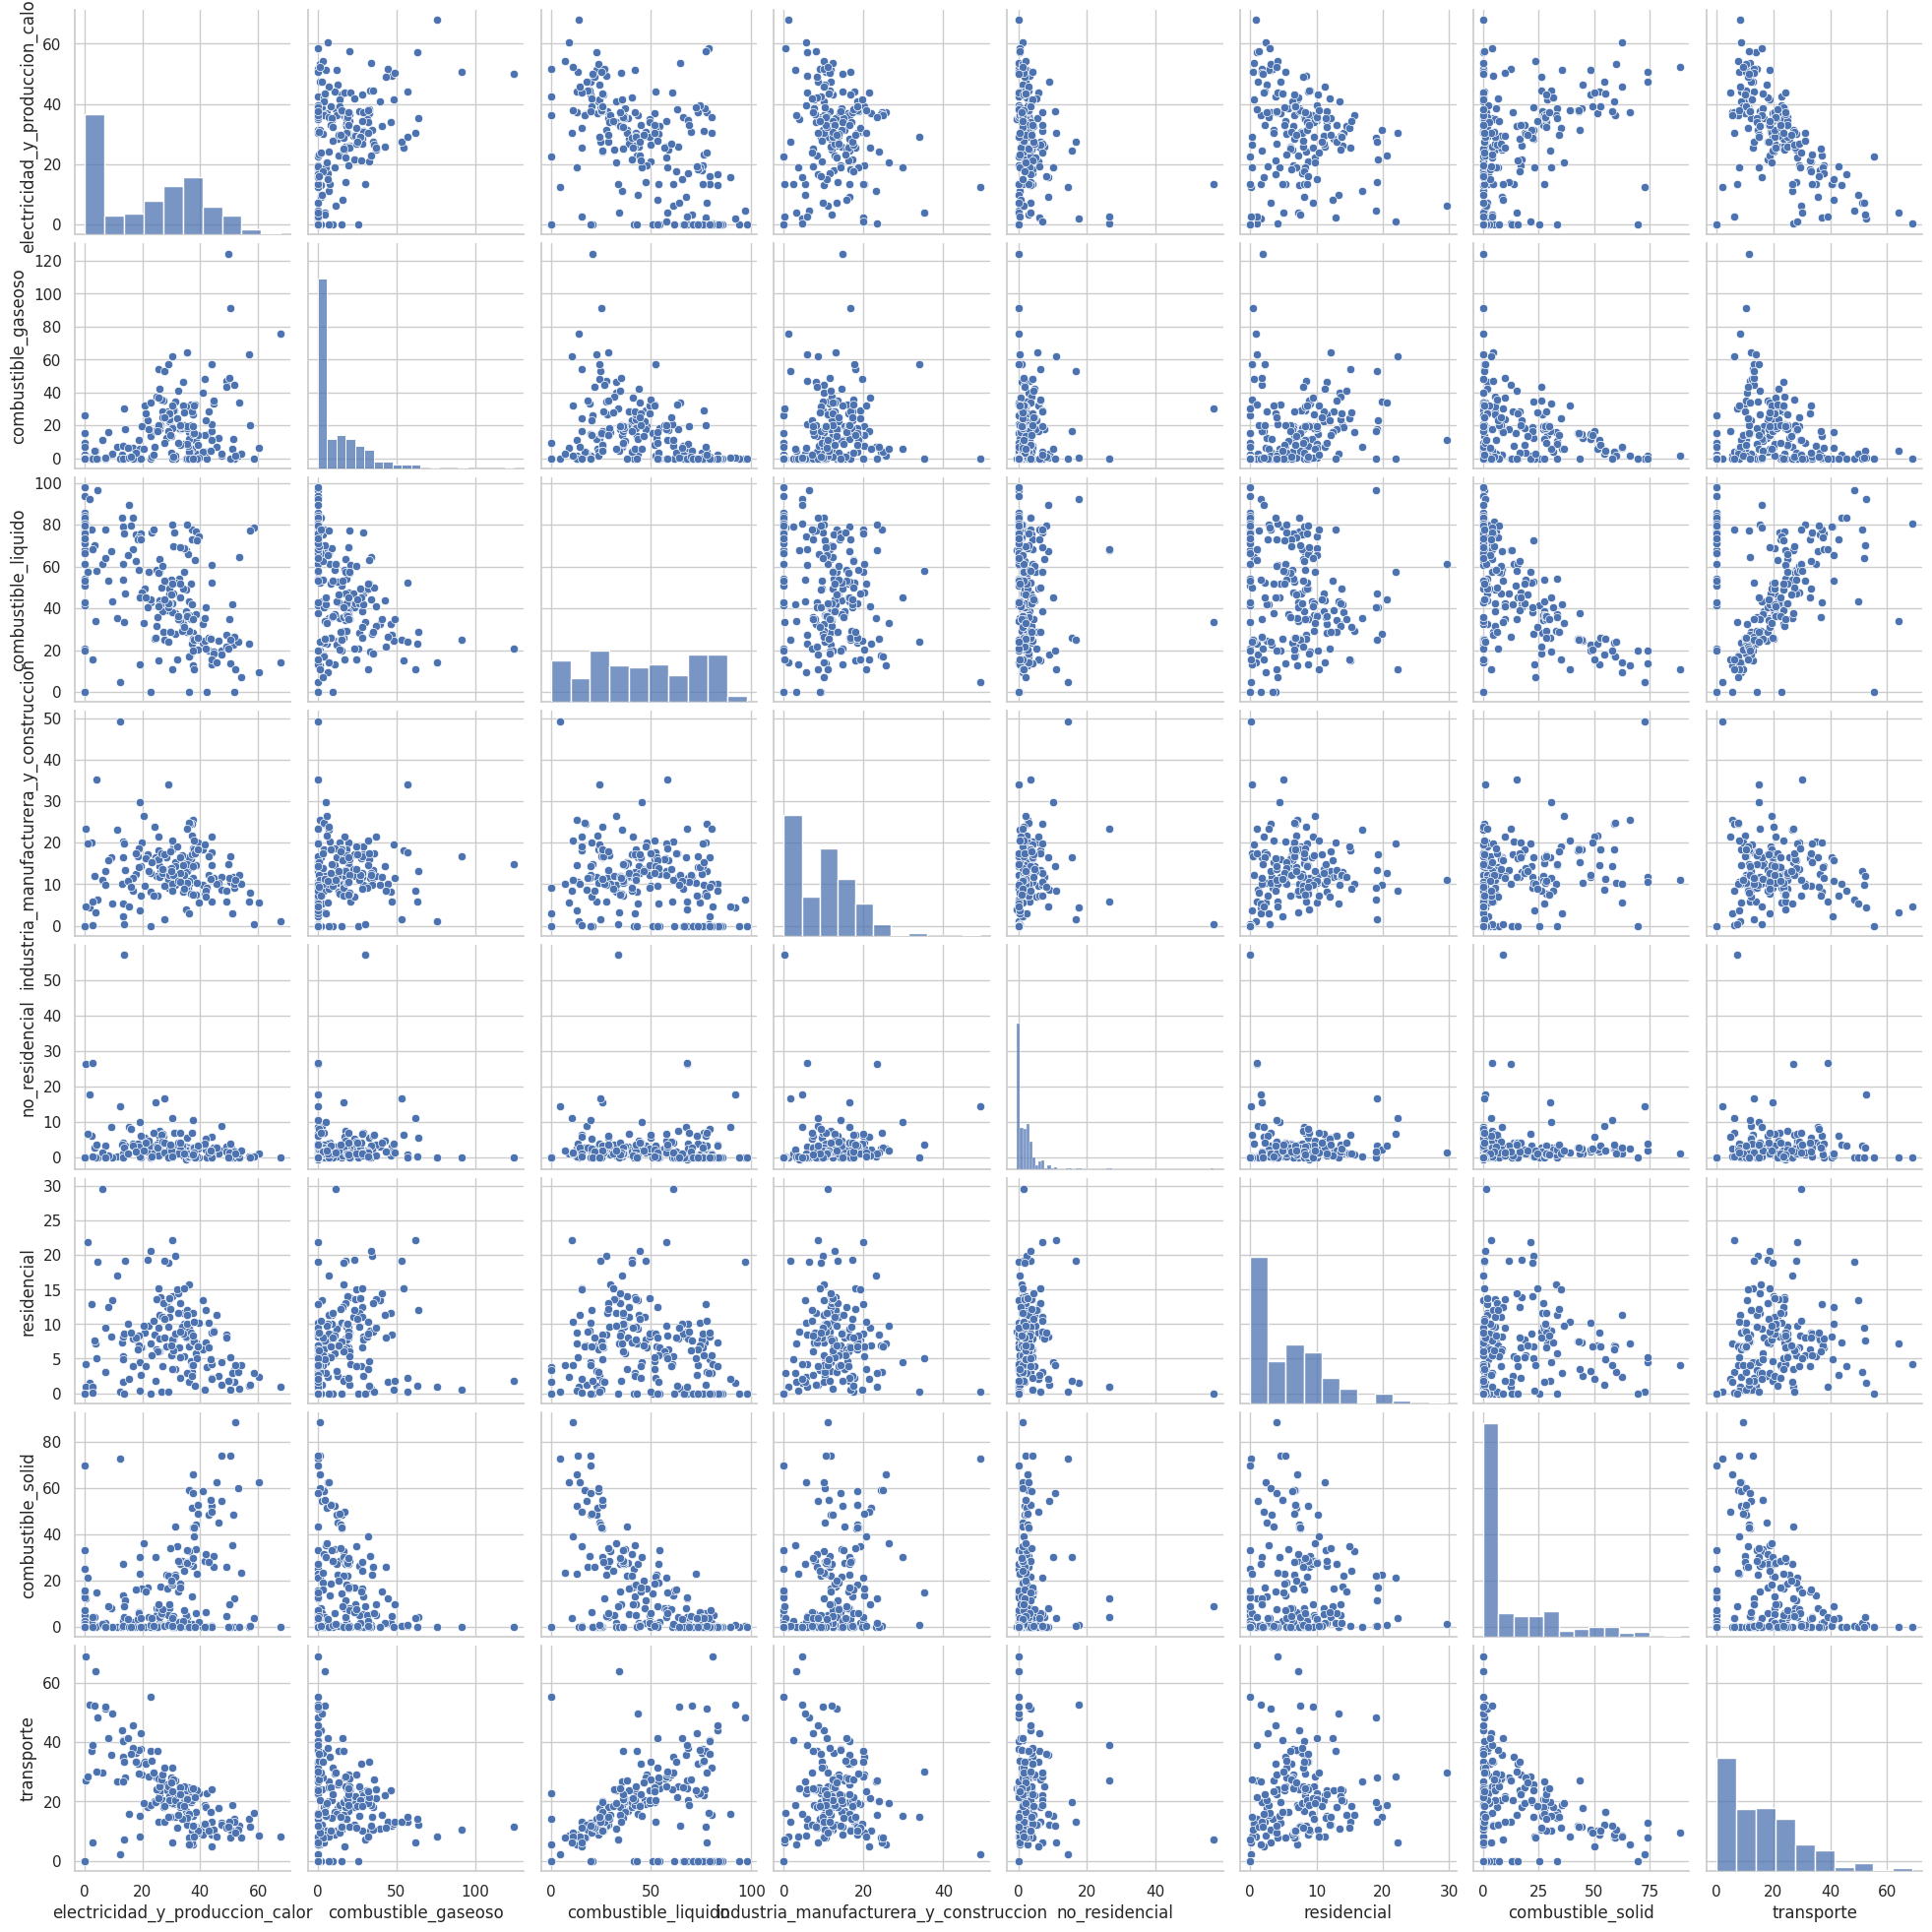

In [ ]:
sns.pairplot(df_variables_mean_countries_filtered)

### Regresion Linear

<Axes: xlabel='transporte', ylabel='combustible_liquido'>

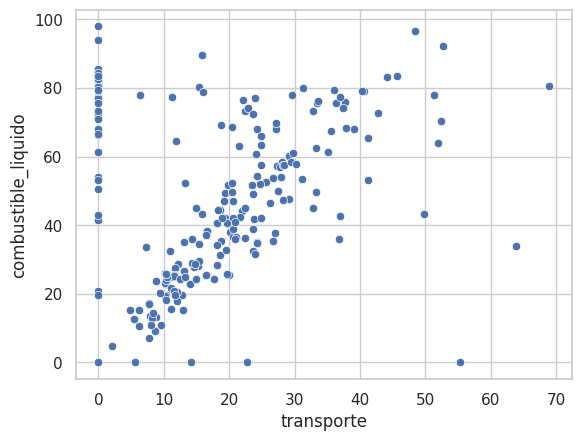

In [ ]:
serie_1 = df_variables_mean_countries_filtered['transporte']
serie_2 = df_variables_mean_countries_filtered['combustible_liquido']

sns.scatterplot(x=serie_1, y=serie_2)

In [ ]:
serie_1.corr(serie_2)

0.2289555685195799

In [ ]:
# Modelo
lr = LinearRegression()
# Fit: Para entrenar el modelo con los datos
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression()

In [ ]:
# Predecir valores
y_predict = lr.predict(serie_1.to_frame())

<Axes: xlabel='transporte', ylabel='combustible_liquido'>

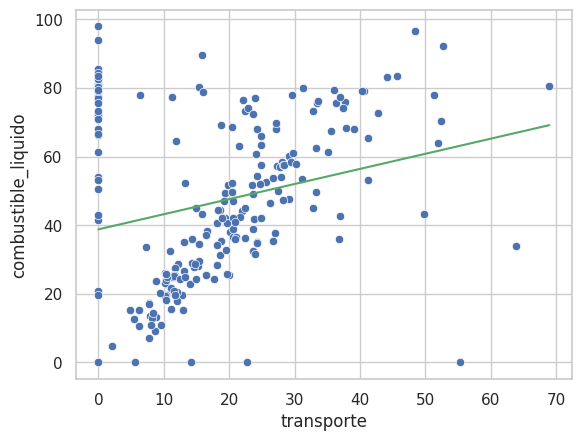

In [ ]:
# Graficar resultados
sns.scatterplot(x=serie_1, y=serie_2)
sns.lineplot(x=serie_1, y=y_predict, c='g')

Se observa que este modelo, no nos sirve para los datos que estamos trabajando

In [ ]:
#metodo score
lr.score(serie_1.to_frame(), serie_2)

0.05242065235612414

In [ ]:
#correlacion al cuadrado
serie_1.corr(serie_2) ** 2

0.05242065235612405

## 5. Distribuciones Muestrales y Técnicas de Evaluación de Modelos

In [ ]:
df_variables_mean_countries_filtered

variable,country,electricidad_y_produccion_calor,combustible_gaseoso,combustible_liquido,industria_manufacturera_y_construccion,no_residencial,residencial,combustible_solid,transporte
0,Afghanistan,0.00,15.04,50.66,0.00,0.00,0.00,14.54,0.00
1,Africa Eastern and Southern,47.30,1.48,19.62,11.73,1.88,4.51,74.17,12.71
2,Africa Western and Central,22.95,13.23,42.67,8.30,2.62,7.26,0.42,37.00
3,Albania,9.09,1.86,67.45,16.52,8.72,8.19,8.28,35.63
4,Algeria,34.10,46.38,32.38,8.16,0.67,11.59,1.91,23.61
...,...,...,...,...,...,...,...,...,...
258,Virgin Islands (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
259,West Bank and Gaza,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
260,"Yemen, Rep.",23.88,1.94,77.82,7.17,6.99,10.41,0.54,29.68
261,Zambia,4.09,0.00,57.94,35.28,3.51,5.02,15.02,30.17


In [ ]:
df_variables_mean_countries_filtered['electricidad_y_produccion_calor']

0       0.00
1      47.30
2      22.95
3       9.09
4      34.10
       ...  
258     0.00
259     0.00
260    23.88
261     4.09
262    37.53
Name: electricidad_y_produccion_calor, Length: 263, dtype: float64

Se aplicará un bootstaping a los datos que se tienen, siendo que se tiene 262 elementos, se generar muestreos de 100 registros.

In [ ]:
df_variables_mean_countries_filtered['electricidad_y_produccion_calor'].sample(frac=0.1, replace=True)

224    19.37
250    28.92
195    45.58
212    57.33
147     0.00
184    35.31
211     0.00
60      0.00
189     0.00
117    51.25
45     28.31
173    32.54
137    39.52
200    50.48
76     44.50
178    25.08
87     24.77
89     13.01
185    41.61
87     24.77
2      22.95
121    34.56
72      0.00
24      0.00
46     37.37
35      0.00
Name: electricidad_y_produccion_calor, dtype: float64

In [ ]:
electricity = df_variables_mean_countries_filtered['electricidad_y_produccion_calor']
means = []

for i in range(100_000):
  sample = electricity.sample(n=30, replace=True)
  means.append(sample.mean())

serie_means = pd.Series(means)

<Axes: ylabel='Count'>

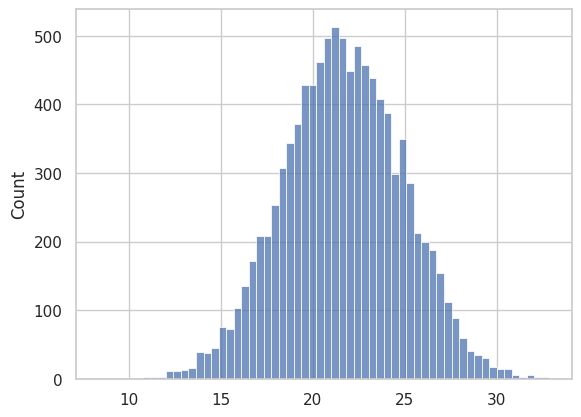

In [ ]:
sns.histplot(serie_means)

In [ ]:
serie_means.skew()

0.015713891890795237

In [ ]:
serie_means.kurtosis()

-0.05740082067883456

In [ ]:
# Error estandar
serie_means.std()

3.253968785053854

Al presentar los datos obtenido del bootstrapping se puede obsevar una distribución normal, que se puede corroborar con las medidas Skew y Kurtosis con valores cercanos a cero, el negativo para Kurtosis solo noa indica que tiene una cola mas larga y pesada hacia el lado derecho. Esta distibucion se confirma en el boxplot e histograma,se muestra los muy datos cercanos a la media con una considerable cantidad de outliners.

Asi mismo observamos que el error estandar es un valor pequeño comparado con el el rango que se obtuvo.

In [ ]:
print("Min", serie_means.min())
print("Max", serie_means.max())
print("Rango", serie_means.max() - serie_means.min())

Min 8.057333333333334
Max 34.99533333333332
Rango 26.937999999999988


<Axes: >

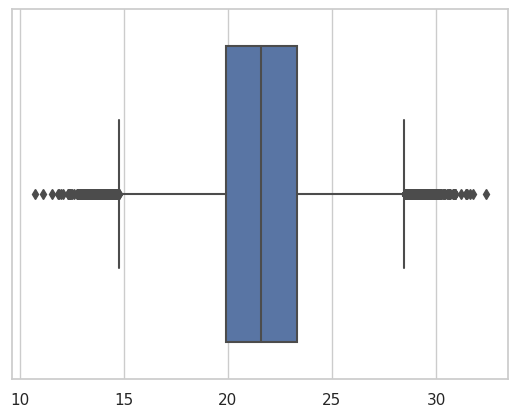

In [ ]:
sns.boxplot(x=serie_means)

In [390]:
# Intervalo de confianza del 95%
upper_limit = serie_means.quantile(0.05)
lower_limit = serie_means.quantile(0.95)

In [392]:
print(f"Intervalo de confianza 95%: {upper_limit} < {electricity.mean()} < {lower_limit}")

Intervalo de confianza 95%: 16.242966666666668 < 21.631140684410646 < 27.066666666666666


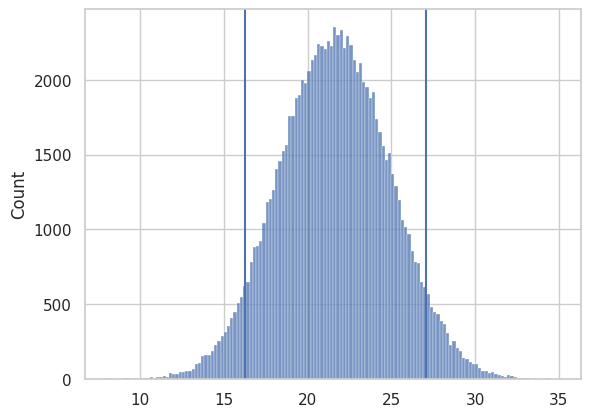

In [393]:
sns.histplot(serie_means, kde=False, stat='count')
plt.axvline(upper_limit)
plt.axvline(lower_limit)

### 6.Visualización de datos avanzada

Validacion cruzada

In [394]:
X = df_variables_mean_countries_filtered['electricidad_y_produccion_calor'].to_frame()
y = df_variables_mean_countries_filtered['industria_manufacturera_y_construccion']

In [396]:
lr = LinearRegression()

In [397]:
scores = cross_validate(lr, X, y, scoring="r2")
scores

{'fit_time': array([0.02713799, 0.00399852, 0.00376844, 0.00388551, 0.00360608]),
 'score_time': array([0.0035305 , 0.00239968, 0.00241184, 0.00229883, 0.00238681]),
 'test_score': array([0.23204363, 0.3113906 , 0.08071159, 0.40301116, 0.28337958])}

In [398]:
print("Score del modelo:", scores['test_score'].mean())

Score del modelo: 0.2621073123940329


Al tener esta validacion cruzada, sabemos que este modelo no nos sirve para hacer una prediccio, ademas que las variables estudiadas no dependen la una de la otra, y no necesariamente su crecimiento esta relacionado.